## Import Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
import pandas as pd

## Import Dataset Mortality

In [2]:
#import dataset
df_mor = pd.read_csv(r'Desktop\File\DQLab\final projects\Dataset\United Nations\Under-five mortality, for both sexes combined (deaths under age five per 1,000 live births).csv')

In [3]:
#because some of the data has projection (after 2022), thats why we must limit to 2022 data
df_mor = df_mor[df_mor['Year(s)']<2023]
df_mor

,Country or Area,Year(s),Variant,Value
79,Afghanistan,2022,Medium,52.8455
80,Afghanistan,2021,Medium,57.9324
81,Afghanistan,2020,Medium,59.4398
82,Afghanistan,2019,Medium,60.5028
83,Afghanistan,2018,Medium,61.8685
...,...,...,...,...
43467,Zimbabwe,1954,Medium,170.6537
43468,Zimbabwe,1953,Medium,174.3600
43469,Zimbabwe,1952,Medium,177.9181
43470,Zimbabwe,1951,Medium,181.4918


In [4]:
#lowercase country or area
df_mor['Country or Area'] = df_mor['Country or Area'].apply(lambda x: x.lower())
df_mor

,Country or Area,Year(s),Variant,Value
79,afghanistan,2022,Medium,52.8455
80,afghanistan,2021,Medium,57.9324
81,afghanistan,2020,Medium,59.4398
82,afghanistan,2019,Medium,60.5028
83,afghanistan,2018,Medium,61.8685
...,...,...,...,...
43467,zimbabwe,1954,Medium,170.6537
43468,zimbabwe,1953,Medium,174.3600
43469,zimbabwe,1952,Medium,177.9181
43470,zimbabwe,1951,Medium,181.4918


In [38]:
df_mor[df_mor['Country or Area']=='Africa Eastern and Southern']

,Country or Area,Year(s),Variant,Value


In [5]:
df_mor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20878 entries, 79 to 43471
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  20878 non-null  object 
 1   Year(s)          20878 non-null  int64  
 2   Variant          20878 non-null  object 
 3   Value            20878 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 815.5+ KB


In [37]:
df_year = df_mor.groupby('Year(s)').agg(mortality=('Value','mean'))
df_year = df_year.reset_index()
df_year

,Year(s),mortality
0,1950,197.230541
1,1951,194.549243
2,1952,188.122791
3,1953,183.189984
4,1954,178.316826
...,...,...
68,2018,25.958444
69,2019,25.321185
70,2020,24.479807
71,2021,23.893369


In [7]:
df_year.to_csv(r'Desktop\File\DQLab\final projects\Dataset\United Nations\yoy_mortality.csv')

## ASEAN

In [8]:
#make a function to filter whether its asean or not
def asean(x):
    if x in ['thailand','viet nam','malaysia','indonesia','myanmar','philippines','lao people\'s democratic republic','singapore','cambodia','brunei darussalam']:
        return 'asean'
    else :
        return 'others'

In [9]:
#filtering only asean
df_asean_mor = df_mor.copy()
df_asean_mor['asean'] = df_asean_mor['Country or Area'].apply(asean)
df_asean_mor = df_asean_mor[df_asean_mor['asean']=='asean']
df_asean_mor

,Country or Area,Year(s),Variant,Value,asean
5247,brunei darussalam,2022,Medium,11.1724,asean
5248,brunei darussalam,2021,Medium,11.0831,asean
5249,brunei darussalam,2020,Medium,11.1092,asean
5250,brunei darussalam,2019,Medium,11.0257,asean
5251,brunei darussalam,2018,Medium,10.8634,asean
...,...,...,...,...,...
42099,viet nam,1954,Medium,142.5301,asean
42100,viet nam,1953,Medium,144.1397,asean
42101,viet nam,1952,Medium,149.9043,asean
42102,viet nam,1951,Medium,156.3146,asean


## Indonesia compared to neighborhood countries

In [10]:
#2022 data
df_asean_morrec = df_asean_mor[df_asean_mor['Year(s)']==2022]
df_2022 = df_asean_morrec
df_2022 = df_2022.sort_values(by='Value')
df_2022

,Country or Area,Year(s),Variant,Value,asean
34887,singapore,2022,Medium,2.1959,asean
23183,malaysia,2022,Medium,6.9600,asean
38687,thailand,2022,Medium,8.3589,asean
5247,brunei darussalam,2022,Medium,11.1724,asean
42031,viet nam,2022,Medium,19.2361,asean
17559,indonesia,2022,Medium,21.3794,asean
6159,cambodia,2022,Medium,24.4891,asean
30783,philippines,2022,Medium,25.6728,asean
20295,lao people's democratic republic,2022,Medium,38.7701,asean
26527,myanmar,2022,Medium,41.8581,asean


In [11]:
df_2022.to_csv(r'Desktop\File\DQLab\final projects\Dataset\United Nations\mortality_2022.csv')

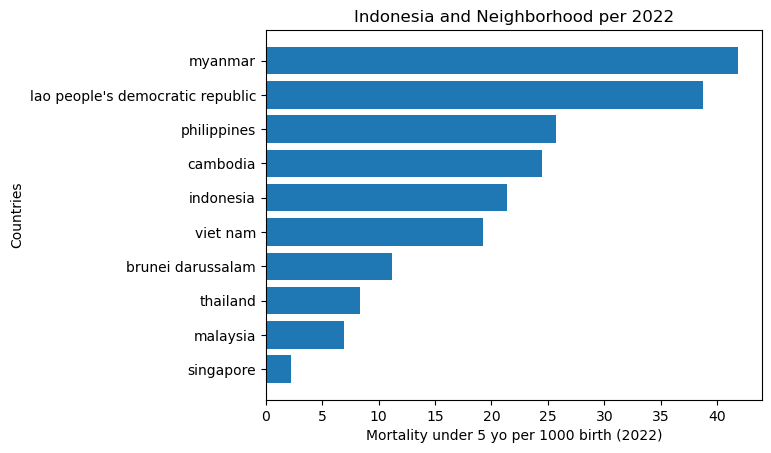

In [12]:
#make a barplot of mortality
plt.barh(df_2022['Country or Area'],df_2022['Value'])
plt.ylabel('Countries')
plt.xlabel('Mortality under 5 yo per 1000 birth (2022)')
plt.title('Indonesia and Neighborhood per 2022')
plt.show()

## Trends Indonesia year to year (after 2000s) vs Neighborhood

In [13]:
#make a lineplot yoy for indonesia and others
df_trends = df_asean_mor
df_trends = df_trends
df_trends

,Country or Area,Year(s),Variant,Value,asean
5247,brunei darussalam,2022,Medium,11.1724,asean
5248,brunei darussalam,2021,Medium,11.0831,asean
5249,brunei darussalam,2020,Medium,11.1092,asean
5250,brunei darussalam,2019,Medium,11.0257,asean
5251,brunei darussalam,2018,Medium,10.8634,asean
...,...,...,...,...,...
42099,viet nam,1954,Medium,142.5301,asean
42100,viet nam,1953,Medium,144.1397,asean
42101,viet nam,1952,Medium,149.9043,asean
42102,viet nam,1951,Medium,156.3146,asean


In [14]:
indonesia = df_trends[df_trends['Country or Area']=='indonesia']
malaysia = df_trends[df_trends['Country or Area']=='malaysia']
singapore = df_trends[df_trends['Country or Area']=='singapore']
thailand = df_trends[df_trends['Country or Area']=='thailand']
philippines = df_trends[df_trends['Country or Area']=='philippines']
myanmar = df_trends[df_trends['Country or Area']=='myanmar']
cambodia = df_trends[df_trends['Country or Area']=='cambodia']
vietnam = df_trends[df_trends['Country or Area']=='viet nam']
brunei = df_trends[df_trends['Country or Area']=='brunei darussalam']
lao = df_trends[df_trends['Country or Area']=='lao people\'s democratic republic']

In [15]:
df_trends.to_csv(r'Desktop\File\DQLab\final projects\Dataset\United Nations\trends.csv')

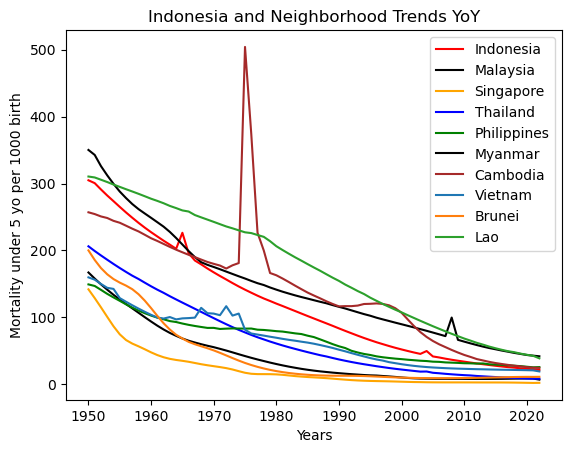

In [16]:
import matplotlib.pyplot as plt

# Data
x = df_trends['Year(s)'].unique()
y1 = indonesia['Value']
y2 = malaysia['Value']
y3 = singapore['Value']
y4 = thailand['Value']
y5 = philippines['Value']
y6 = myanmar['Value']
y7 = cambodia['Value']
y8 = vietnam['Value']
y9 = brunei['Value']
y10 = lao['Value']
# Plot data
plt.plot(x, y1, label="Indonesia", color='red')
plt.plot(x, y2, label="Malaysia", color = 'black')
plt.plot(x, y3, label="Singapore", color = 'orange')
plt.plot(x, y4, label="Thailand", color ='blue')
plt.plot(x, y5, label="Philippines", color ='green')
plt.plot(x, y6, label="Myanmar", color = 'black')
plt.plot(x, y7, label="Cambodia", color = 'brown')
plt.plot(x, y8, label="Vietnam")
plt.plot(x, y9, label="Brunei")
plt.plot(x, y10, label="Lao")
plt.xlabel('Years')
plt.ylabel('Mortality under 5 yo per 1000 birth')
plt.title('Indonesia and Neighborhood Trends YoY')
# Tambahkan legend
plt.legend()

# Tampilkan plot
plt.show()


Indonesia having a good sign to reduce this phenomena from year to year <br>
But, we still higher than other countries.

## Is our country having siginificance difference between our neighbor country?

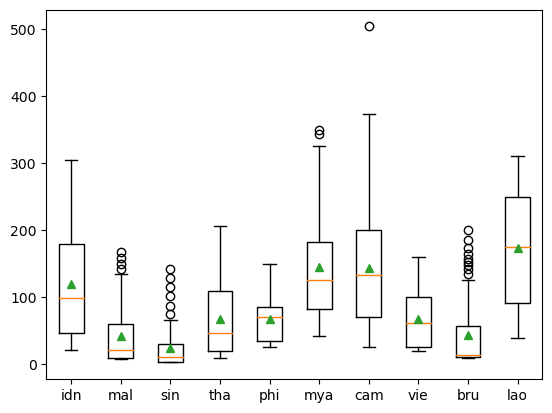

In [17]:
#showing boxplot to see difference means for each group
plt.boxplot([y1,y2,y3,y4,y5,y6,y7,y8,y9,y10],labels=['idn','mal','sin','tha','phi','mya','cam','vie','bru','lao'],showmeans=True)
plt.show()
#green triangle means (mean)

In [18]:
from scipy import stats

stats.f_oneway(y1,y2,y3,y4,y5,y6,y7,y8,y9,y10)

F_onewayResult(statistic=47.60341216866226, pvalue=2.5186463606930948e-67)

because p-value < 0.05 as confidence level, we reject H0 <br>
__Insight : there is at least one group has difference significance mortality__<br>
__Possible cause : there is different factor that affect mortality of each country__

## Then, what possible factor causing this thing happen?

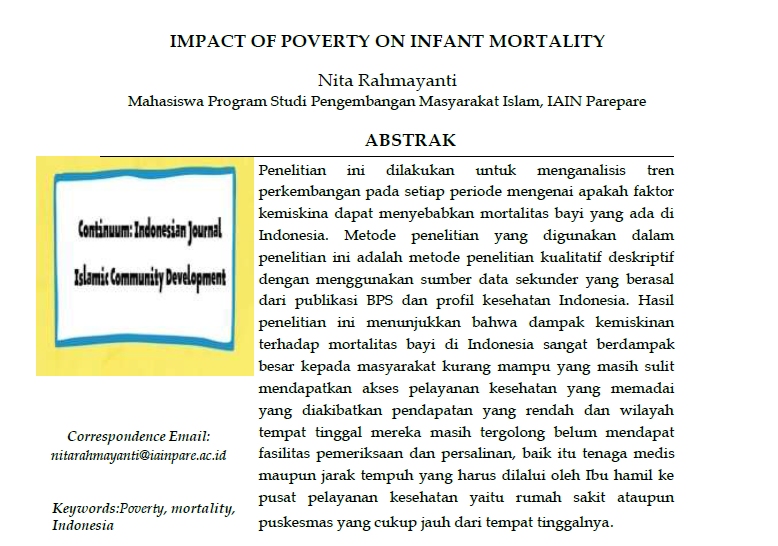

Why some countries having more mortality case than the others? what possible factors make this happen?

I try to correlate between __mortality, school life expectancy, poverty and adolescent fertility rate__ in Indonesia

In [19]:
df_sch = pd.read_csv(r'Desktop\File\DQLab\final projects\Dataset\United Nations\undata.csv')
df_pov = pd.read_csv(r'Desktop\File\DQLab\final projects\Dataset\United Nations\Poverty gap at $2.15 a day (2017 PPP) (%).csv')
df_fer = pd.read_csv(r'Desktop\File\DQLab\final projects\Dataset\United Nations\Adolescent fertility rate (births per 1,000 women ages 15-19).csv')

In [20]:
df_sch

,Reference Area,Country or Area,Time Period,Year(s),school_years,mortality_5
0,Afghanistan,Afghanistan,2014,2014,10.10156,76.2991
1,Afghanistan,Afghanistan,2013,2013,10.09513,78.2382
2,Afghanistan,Afghanistan,2012,2012,9.93635,81.6174
3,Afghanistan,Afghanistan,2011,2011,9.44555,85.2189
4,Afghanistan,Afghanistan,2010,2010,9.52607,89.2781
...,...,...,...,...,...,...
4885,Zimbabwe,Zimbabwe,1979,1979,4.64668,112.5299
4886,Zimbabwe,Zimbabwe,1978,1978,4.82824,113.4300
4887,Zimbabwe,Zimbabwe,1977,1977,5.34468,113.9289
4888,Zimbabwe,Zimbabwe,1976,1976,5.45476,113.9011


In [21]:
df_fer

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Fertility Rate
0,Aruba,ABW,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,62.182
1,Aruba,ABW,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1961,61.589
2,Aruba,ABW,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1962,61.170
3,Aruba,ABW,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1963,59.658
4,Aruba,ABW,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1964,58.324
...,...,...,...,...,...,...
16425,Zimbabwe,ZWE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,2017,98.265
16426,Zimbabwe,ZWE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,2018,98.507
16427,Zimbabwe,ZWE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,2019,97.354
16428,Zimbabwe,ZWE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,2020,96.180


In [22]:
df_pov

,Country or Area,Year,Value
0,Albania,2020,0.0
1,Albania,2019,0.0
2,Albania,2018,0.0
3,Albania,2017,0.0
4,Albania,2016,0.0
...,...,...,...
2494,Zambia,1993,30.9
2495,Zambia,1991,37.0
2496,Zimbabwe,2019,13.5
2497,Zimbabwe,2017,9.4


In [23]:
#merging data with variable mortality,school and marriage mean age
df_merge = pd.merge(df_sch,df_fer,left_on=['Reference Area','Time Period'],right_on=['Country Name','Year'], how ='inner')
df_merge

,Reference Area,Country or Area,Time Period,Year(s),school_years,mortality_5,Country Name,Country Code,Indicator Name,Indicator Code,Year,Fertility Rate
0,Afghanistan,Afghanistan,2014,2014,10.10156,76.2991,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,2014,101.454
1,Afghanistan,Afghanistan,2013,2013,10.09513,78.2382,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,2013,106.537
2,Afghanistan,Afghanistan,2012,2012,9.93635,81.6174,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,2012,111.286
3,Afghanistan,Afghanistan,2011,2011,9.44555,85.2189,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,2011,116.454
4,Afghanistan,Afghanistan,2010,2010,9.52607,89.2781,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,2010,120.820
...,...,...,...,...,...,...,...,...,...,...,...,...
4384,Zimbabwe,Zimbabwe,1979,1979,4.64668,112.5299,Zimbabwe,ZWE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1979,145.589
4385,Zimbabwe,Zimbabwe,1978,1978,4.82824,113.4300,Zimbabwe,ZWE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1978,147.881
4386,Zimbabwe,Zimbabwe,1977,1977,5.34468,113.9289,Zimbabwe,ZWE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1977,145.051
4387,Zimbabwe,Zimbabwe,1976,1976,5.45476,113.9011,Zimbabwe,ZWE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1976,151.568


In [24]:
#manipulating merge dataframe
df_merge = df_merge.loc[:,['Reference Area','Year','school_years','mortality_5','Fertility Rate']]
df_merge

,Reference Area,Year,school_years,mortality_5,Fertility Rate
0,Afghanistan,2014,10.10156,76.2991,101.454
1,Afghanistan,2013,10.09513,78.2382,106.537
2,Afghanistan,2012,9.93635,81.6174,111.286
3,Afghanistan,2011,9.44555,85.2189,116.454
4,Afghanistan,2010,9.52607,89.2781,120.820
...,...,...,...,...,...
4384,Zimbabwe,1979,4.64668,112.5299,145.589
4385,Zimbabwe,1978,4.82824,113.4300,147.881
4386,Zimbabwe,1977,5.34468,113.9289,145.051
4387,Zimbabwe,1976,5.45476,113.9011,151.568


In [25]:
#merge with poverty data
df_fmerge = pd.merge(df_merge,df_pov,left_on=['Reference Area','Year'],right_on=['Country or Area','Year'], how='inner')
df_fmerge = df_fmerge.rename(columns={'Value':'poverty_percentage','Fertility Rate':'ferr_rate'})
df_fmerge = df_fmerge.loc[:,['Country or Area','Year','school_years','mortality_5','ferr_rate','poverty_percentage']]
df_fmerge

,Country or Area,Year,school_years,mortality_5,ferr_rate,poverty_percentage
0,Albania,2014,12.24150,9.9001,20.942,0.1
1,Albania,2012,11.65449,11.2034,20.909,0.1
2,Albania,2008,10.62825,15.8165,18.545,0.0
3,Albania,2005,10.20986,20.0961,18.869,0.1
4,Albania,2002,9.90260,24.5301,13.217,0.2
...,...,...,...,...,...,...
969,Uruguay,2007,12.38693,12.4833,65.740,0.1
970,Uruguay,2006,12.93982,13.1134,67.703,0.1
971,Uzbekistan,2003,10.88929,50.3962,11.836,37.8
972,Uzbekistan,2000,10.07901,60.7181,20.941,38.4


In [26]:
#seeing missing values
df_fmerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country or Area     974 non-null    object 
 1   Year                974 non-null    int64  
 2   school_years        974 non-null    float64
 3   mortality_5         974 non-null    float64
 4   ferr_rate           974 non-null    float64
 5   poverty_percentage  974 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ KB


The data is clean from null

In [27]:
#lowercase country or area column
df_fmerge['Country or Area'] = df_fmerge['Country or Area'].apply(lambda x: x.lower())
df_fmerge

,Country or Area,Year,school_years,mortality_5,ferr_rate,poverty_percentage
0,albania,2014,12.24150,9.9001,20.942,0.1
1,albania,2012,11.65449,11.2034,20.909,0.1
2,albania,2008,10.62825,15.8165,18.545,0.0
3,albania,2005,10.20986,20.0961,18.869,0.1
4,albania,2002,9.90260,24.5301,13.217,0.2
...,...,...,...,...,...,...
969,uruguay,2007,12.38693,12.4833,65.740,0.1
970,uruguay,2006,12.93982,13.1134,67.703,0.1
971,uzbekistan,2003,10.88929,50.3962,11.836,37.8
972,uzbekistan,2000,10.07901,60.7181,20.941,38.4


## Is there any correlation between each variables?

In [28]:
#slicing
df_factors = df_fmerge.loc[:,['school_years','mortality_5','poverty_percentage','ferr_rate']]
df_factors

,school_years,mortality_5,poverty_percentage,ferr_rate
0,12.24150,9.9001,0.1,20.942
1,11.65449,11.2034,0.1,20.909
2,10.62825,15.8165,0.0,18.545
3,10.20986,20.0961,0.1,18.869
4,9.90260,24.5301,0.2,13.217
...,...,...,...,...
969,12.38693,12.4833,0.1,65.740
970,12.93982,13.1134,0.1,67.703
971,10.88929,50.3962,37.8,11.836
972,10.07901,60.7181,38.4,20.941


In [29]:
df_factors.to_csv(r'Desktop\File\DQLab\final projects\Dataset\United Nations\correlation.csv')

In [30]:
corr = df_factors.corr()
corr

,school_years,mortality_5,poverty_percentage,ferr_rate
school_years,1.000000,-0.815136,-0.641594,-0.714253
mortality_5,-0.815136,1.000000,0.806286,0.763006
poverty_percentage,-0.641594,0.806286,1.000000,0.638186
ferr_rate,-0.714253,0.763006,0.638186,1.000000


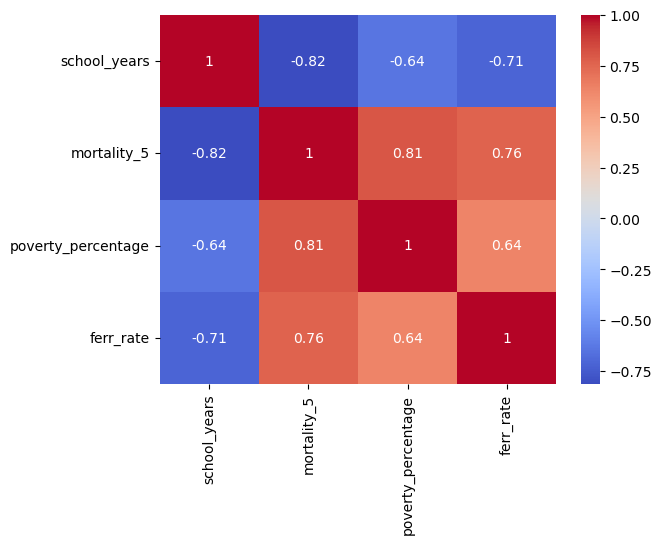

In [31]:
custom_cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(data=corr,cmap=custom_cmap,annot=True)
plt.show()

Based on the Heatmap Chart above, we see that there is __strong correlation between each of the variables__ <br>
it may can conclude that : __<br>1. school life expectancy,<br>2. poverty,<br>3. fertility rate<br>__ are may factors for mortality children under 5 years old 

it makes sense, because if we see school life expectancy will impact to revenue. And it also will impact to poverty. <br>
some cases, also giving us information some people drop out from school because marry at the age below the ideal age of marriage

## How those factors affecting to indonesia's mortality

In [32]:
df_indo = df_fmerge.copy()
df_indo = df_indo[df_indo['Country or Area']=='indonesia']
df_indo

,Country or Area,Year,school_years,mortality_5,ferr_rate,poverty_percentage
464,indonesia,2014,11.31256,28.8110,40.797,1.5
465,indonesia,2013,11.34091,29.9974,43.219,1.8
466,indonesia,2012,11.34168,31.1914,44.762,2.3
467,indonesia,2011,11.25705,32.4607,45.537,2.9
468,indonesia,2010,11.11155,33.8431,45.847,3.5
469,indonesia,2009,10.97268,35.2244,45.899,4.3
470,indonesia,2008,10.62770,36.6653,47.016,5.3
471,indonesia,2007,10.77083,38.2720,47.631,5.7
472,indonesia,2006,10.11685,40.0891,47.363,7.5
473,indonesia,2005,10.07292,41.6301,47.849,5.3


In [33]:
year = df_indo['Year']
school_ex = df_indo['school_years']
mortality = df_indo['mortality_5']
fertility = df_indo['ferr_rate']
poverty = df_indo['poverty_percentage']

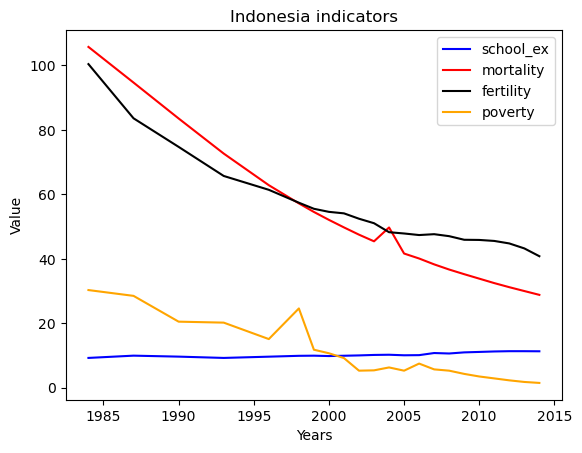

In [34]:
# Plot data
plt.plot(year, school_ex, label="school_ex", color='blue')
plt.plot(year, mortality, label="mortality", color = 'red')
plt.plot(year, fertility, label="fertility", color = 'black')
plt.plot(year, poverty, label="poverty", color ='orange')
plt.xlabel('Years')
plt.ylabel('Value')
plt.title('Indonesia indicators')
# Tambahkan legend
plt.legend()

# Tampilkan plot
plt.show()

From data above, we see there is a trend yoy for all indicators in indonesia <br>
we see all indicators (except school life expectancy) are decreasing year by year. obviously, __it is a good sign for indonesia to increase the progress of a nation__<br>

## How do we reduce mortality for our Indonesian children?

Here are the thing that we can do in order to reduce our children mortality :<br>
1. Provide education on the risks of marrying under 20 yo <br>
2. The importance of education for parents before marriage <br>
3. Parents revenue linear with thier education level and also correlate with nutrition for their children

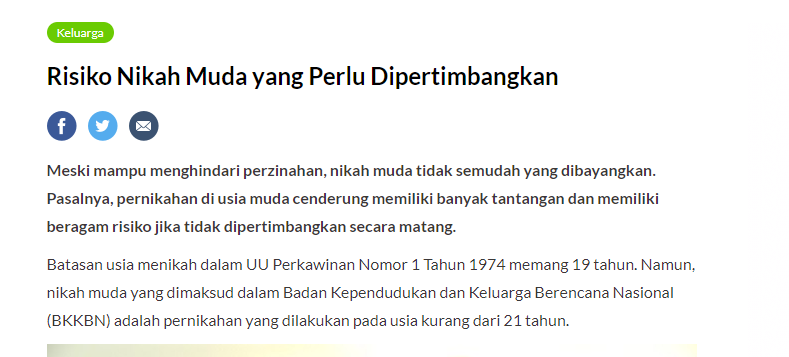

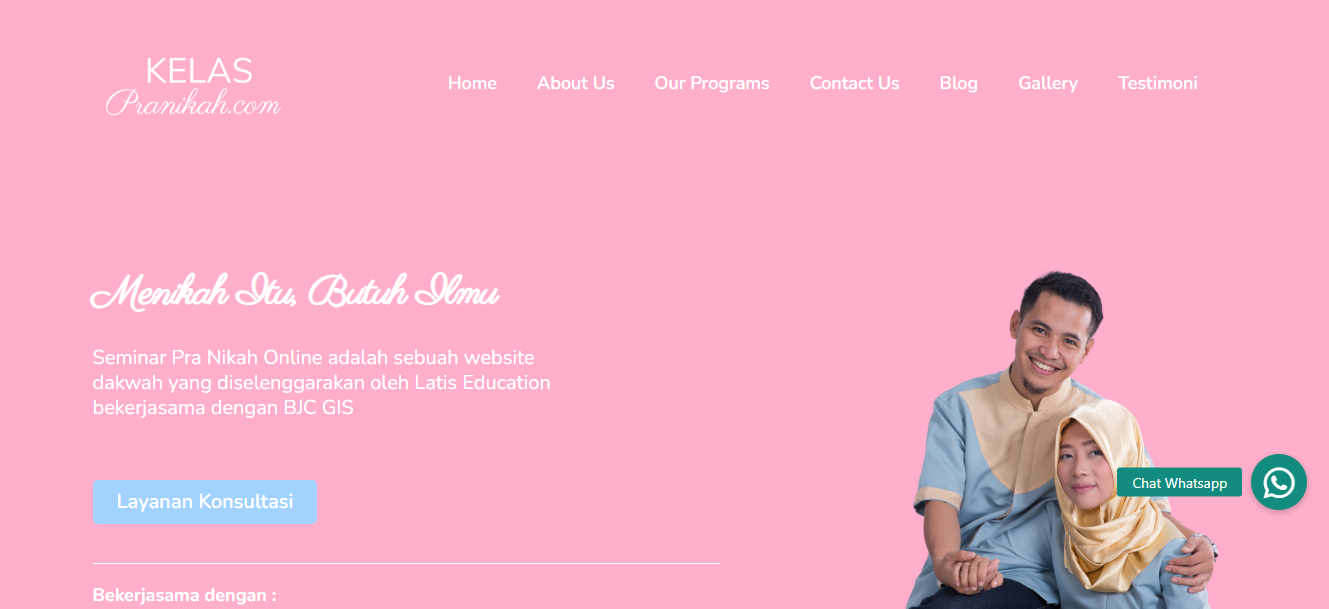

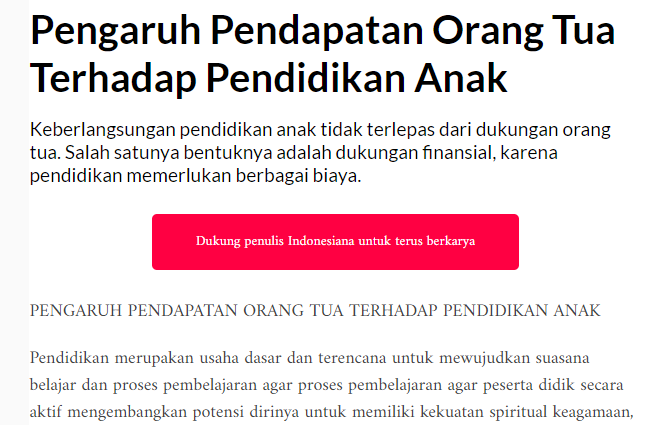